In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

from IPython.display import display, HTML

pd.options.display.max_rows = 100

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
geolocations_original = pd.read_csv('.\\Bases\\olistbr-brazilian-ecommerce\\olist_geolocation_dataset.csv')
customers_original = pd.read_csv('.\\Bases\\olistbr-brazilian-ecommerce\\olist_customers_dataset.csv')
sellers_original = pd.read_csv('.\\Bases\\olistbr-brazilian-ecommerce\\olist_sellers_dataset.csv')
orders_original = pd.read_csv('.\\Bases\\olistbr-brazilian-ecommerce\\olist_orders_dataset.csv')
order_items_original = pd.read_csv('.\\Bases\\olistbr-brazilian-ecommerce\\olist_order_items_dataset.csv')
products_original = pd.read_csv('.\\Bases\\olistbr-brazilian-ecommerce\\olist_products_dataset.csv')

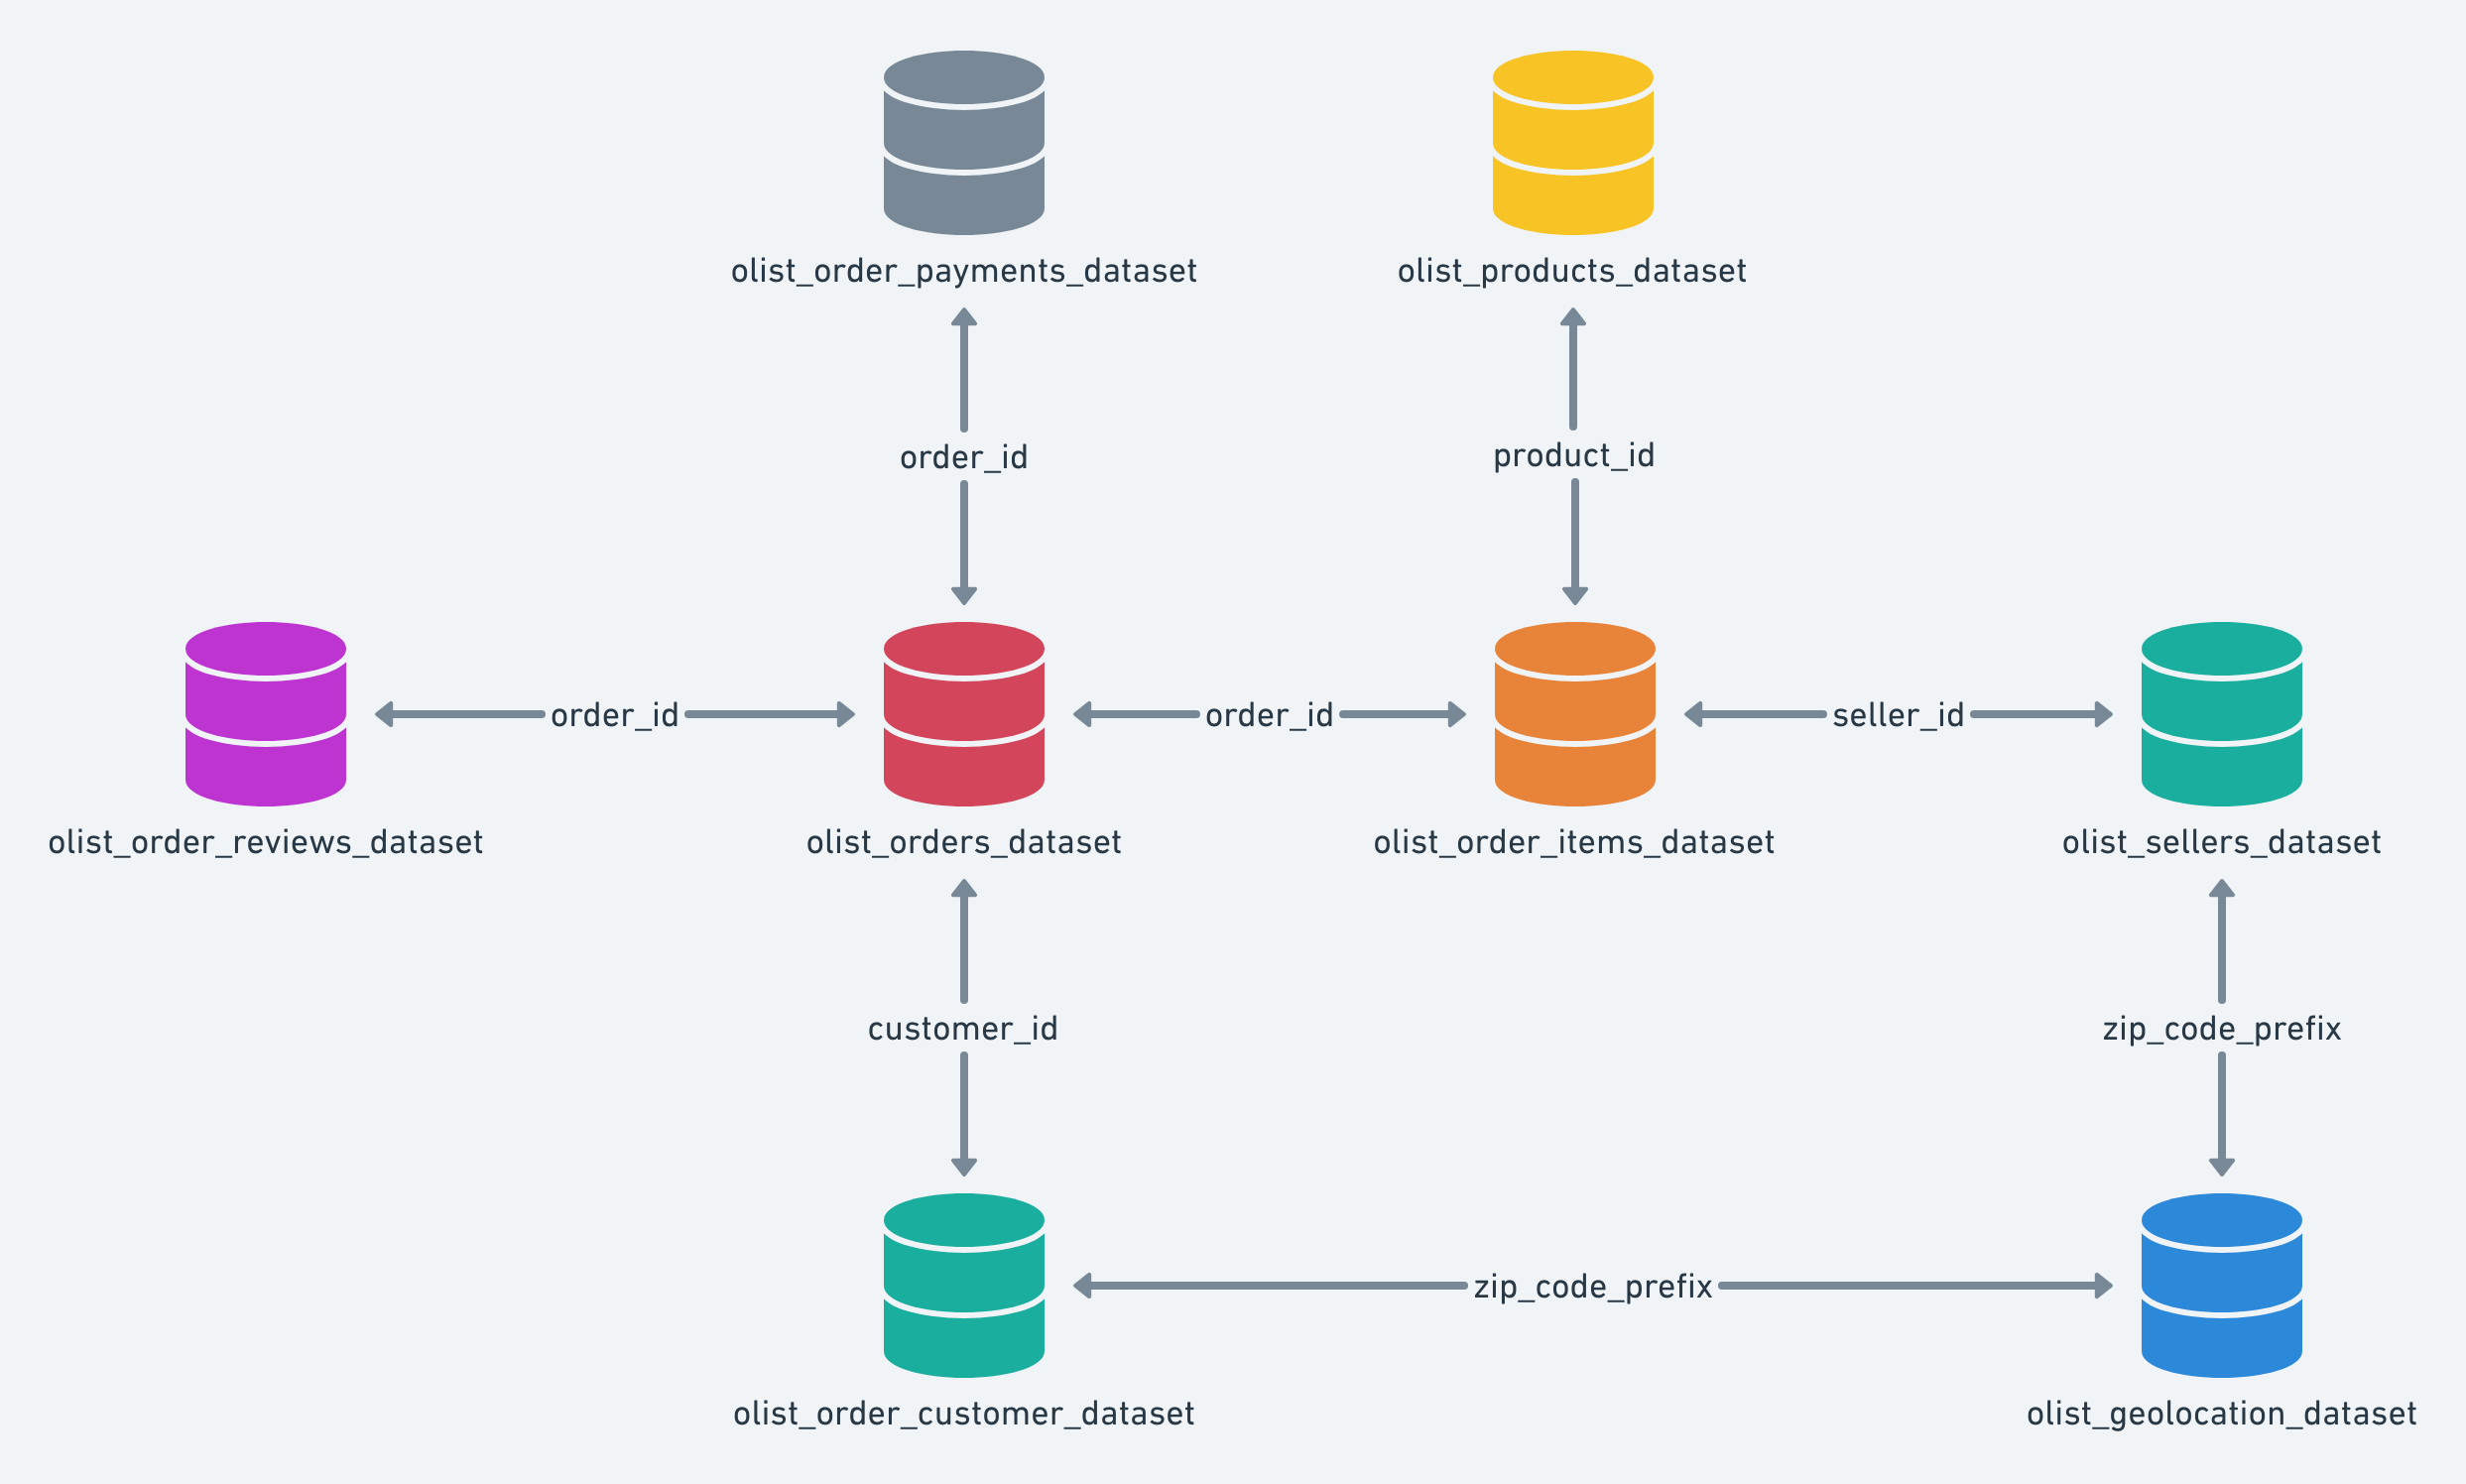

# Geolocations

In [3]:
geolocations = geolocations_original.copy()
geolocations = geolocations.query("geolocation_zip_code_prefix not in [36512]")
geolocations["id"] = geolocations.index

geolocations.geolocation_city = geolocations.geolocation_city.apply(unidecode)
geolocations.geolocation_city = geolocations.geolocation_city.str.upper()
geolocations.geolocation_city = geolocations.geolocation_city.str.strip()
geolocations.geolocation_city = geolocations.geolocation_city.replace(to_replace=r"\s\s", value=" ", regex=True)
geolocations.geolocation_city = geolocations.geolocation_city.replace(to_replace="PORTO AELGRE", value="PORTO ALEGRE")
geolocations.geolocation_city = geolocations.geolocation_city.replace(to_replace="XANGRILA", value="XANGRI-LA")
geolocations.geolocation_city = geolocations.geolocation_city.replace(to_replace=r"(SAOPAULO|(\W|^)SP(\W|$)|SAPSO PAULO)", value="SAO PAULO", regex=True)
geolocations.geolocation_city = geolocations.geolocation_city.replace(to_replace=r"(PORTO )?HERVAL D(\s)?OESTE", value="HERVAL DOESTE", regex=True)
geolocations.geolocation_city = geolocations.geolocation_city.replace(to_replace="HERVAL D OESTE", value="HERVAL DOESTE")
geolocations.geolocation_city = geolocations.geolocation_city.replace(to_replace=r"'", value="", regex=True)

geolocations.geolocation_state = geolocations.geolocation_state.str.strip()
geolocations.geolocation_state = np.where(geolocations.isin({"geolocation_city":["SAO PAULO"]})["geolocation_city"],
                                          "SP",
                                          geolocations.geolocation_state
                                         )
geolocations = geolocations.query("geolocation_state == 'SP'")

In [4]:
geolocations

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,id
0,1037,-23.545621,-46.639292,SAO PAULO,SP,0
1,1046,-23.546081,-46.644820,SAO PAULO,SP,1
2,1046,-23.546129,-46.642951,SAO PAULO,SP,2
3,1041,-23.544392,-46.639499,SAO PAULO,SP,3
4,1035,-23.541578,-46.641607,SAO PAULO,SP,4
...,...,...,...,...,...,...
404265,19970,-22.779062,-50.218287,PALMITAL,SP,404265
404266,19905,-22.997601,-49.885928,OURINHOS,SP,404266
404267,19907,-22.978498,-49.875919,OURINHOS,SP,404267
404268,19905,-22.993127,-49.887665,OURINHOS,SP,404268


# Customer Gelocations

In [5]:
customers = customers_original.copy()
customers = customers.drop("customer_unique_id", 1)
customers.customer_city = customers.customer_city.apply(unidecode)
customers.customer_city = customers.customer_city.str.upper()
customers.customer_city = customers.customer_city.str.strip()
customers.customer_city = customers.customer_city.replace(to_replace=r"'", value="", regex=True)

df = pd.merge(
    geolocations.rename(columns={"geolocation_zip_code_prefix":"geolocation_id", "geolocation_city":"city", "geolocation_state":"state"}),
    customers.rename(columns={"customer_zip_code_prefix":"geolocation_id", "customer_city":"city", "customer_state":"state" }),
    left_on=["geolocation_id", "city","state"],
    right_on=["geolocation_id", "city","state"],
    how="inner"
)

# sorteando um geolocation_id
customer_geolocations = df.drop_duplicates("geolocation_id").query("(state == 'SP')")

customer_geolocations

,geolocation_id,geolocation_lat,geolocation_lng,city,state,id,customer_id
0,1037,-23.545621,-46.639292,SAO PAULO,SP,0,05b005e82f3f2dcc41b5504f00484e50
78,1046,-23.546081,-46.644820,SAO PAULO,SP,1,9a02295e3381803554347ab4dc1ab41b
2616,1041,-23.544392,-46.639499,SAO PAULO,SP,3,8f1a8643c245e8b74e2e6535ca5c4e19
2666,1035,-23.541578,-46.641607,SAO PAULO,SP,4,30d149ba8c3793107e4829a8aaa4406f
2939,1012,-23.547762,-46.635361,SAO PAULO,SP,5,c5c064df6a4c428df004ad4759092dcb
...,...,...,...,...,...,...,...
5601341,19901,-22.992072,-49.872094,OURINHOS,SP,403110,196d61c804eddccab4441e7a7cc781e8
5601521,19904,-23.015574,-49.884054,OURINHOS,SP,403113,893ab218533ae69e11ea359251e3f2b9
5601551,19902,-22.998682,-49.864821,OURINHOS,SP,403143,7a4f8eaebcf61c55ecc1812c83311787
5601588,19909,-22.970507,-49.906618,OURINHOS,SP,403155,f488a45102f975164cf01224932be323


### removendo essas geolocalizações do dataframe geolocations

In [6]:
left_anti = set(geolocations.id).difference(customer_geolocations.id)
print("antes:", geolocations.count()["geolocation_zip_code_prefix"])
geolocations = geolocations[geolocations.isin({"id":left_anti})["id"]]
print("depois:", geolocations.count()["geolocation_zip_code_prefix"])

antes: 404270
depois: 398695


In [7]:
404270-398695

5575

# Seller Geolocations

In [8]:
sellers = sellers_original.copy()
sellers.seller_city = sellers.seller_city.apply(unidecode)
sellers.seller_city = sellers.seller_city.str.upper()
sellers.seller_city = sellers.seller_city.str.strip()
sellers.seller_city = sellers.seller_city.replace(to_replace=r"\s\s", value=" ", regex=True)
sellers.seller_city = sellers.seller_city.replace(to_replace="(\W|^)SP(\W|$)", value="SAO PAULO", regex=True)
sellers.seller_city = sellers.seller_city.replace(to_replace=".*((\W|\w)SAO PAULO|SAO PAULO(\W|\w)).*", value="SAO PAULO", regex=True)
sellers.seller_city = sellers.seller_city.replace(to_replace="SAO PAUO", value="SAO PAULO")
sellers.seller_city = sellers.seller_city.replace(to_replace=r"D'", value="DO ", regex=True)
sellers.seller_city = sellers.seller_city.replace(to_replace=r"\s-\s[A-Z]{2}", value="", regex=True)
sellers.seller_city = np.where(sellers.seller_city.str.contains(pat=r"(((^|\s)[A-Z]+)+,)+\sBRASIL", regex=True),
                               sellers.seller_city.str.extract(pat=r"(((^|\s)[A-Z]+)+)(,(\s[A-Z]+)+,\sBRASIL)")[0],
                               sellers.seller_city
                               )

sellers.seller_state = sellers.seller_state.str.strip()
sellers.seller_state = np.where(sellers.isin({"seller_city":["CAXIAS DO SUL", "PORTO ALEGRE"]})["seller_city"],
                                "RS",
                                np.where(sellers.isin({"seller_city":["CHAPECO", "BLUMENAU", "LAGUNA", "ITAJAI", "PALHOCA", "FLORIANOPOLIS"]})["seller_city"],
                                         "SC",
                                         np.where(sellers.isin({"seller_city":["RIO DE JANEIRO", "VOLTA REDONDA"]})["seller_city"],
                                                  "RJ",
                                                  np.where(sellers.isin({"seller_city":["VILA VELHA"]})["seller_city"],
                                                           "ES",
                                                           np.where(sellers.isin({"seller_city":["BELO HORIZONTE", "JUIZ DE FORA", "ANDRADAS"]})["seller_city"],
                                                                    "MG",
                                                                    np.where(sellers.isin({"seller_city":["GOIOERE", "SERTANOPOLIS", "LONDRINA", "MARECHAL CANDIDO RONDON", "LARANJEIRAS DO SUL", "PINHAIS", "SAO JOSE DOS PINHAIS", "CURITIBA"]})["seller_city"],
                                                                             "PR",
                                                                             np.where(sellers.isin({"seller_city":["IPIRA"]})["seller_city"],
                                                                                      "BA",
                                                                                      sellers.seller_state
                                                                                     )
                                                                            )
                                                                   )
                                                          )
                                                 )
                                        )
                               )

df = pd.merge(
    geolocations.rename(columns={"geolocation_zip_code_prefix":"geolocation_id", "geolocation_city":"city", "geolocation_state":"state"}),
    sellers.rename(columns={"seller_zip_code_prefix":"geolocation_id", "seller_city":"city", "seller_state":"state"}),
    left_on=["geolocation_id", "city", "state"],
    right_on=["geolocation_id", "city", "state"],
    how="inner"
)

sellers_geolocation = df.drop_duplicates("geolocation_id").query("(state == 'SP')")

sellers_geolocation

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,geolocation_id,geolocation_lat,geolocation_lng,city,state,id,seller_id
0,1039,-23.541883,-46.639919,SAO PAULO,SP,16,2d34636518ba88f5349b732fcf8ba2e4
19,1041,-23.543539,-46.640577,SAO PAULO,SP,29,e5cbe890e679490127e9a390b46bbd20
43,1035,-23.540205,-46.644147,SAO PAULO,SP,55,1d503743d2526f03f0c2c89540ee008c
81,1042,-23.545052,-46.640072,SAO PAULO,SP,58,b6c6854d4d92a5f6f46be8869da3fa1a
120,1040,-23.540317,-46.637355,SAO PAULO,SP,59,784ba75dd9d20200c4caed3d7a77141a
...,...,...,...,...,...,...,...
222430,19804,-22.662383,-50.432975,ASSIS,SP,401817,5d3bb11474a06bdc23fb9e89f1164ee0
222493,19820,-22.743569,-50.581154,TARUMA,SP,401824,f5f1f2c5f923f36ad79ea1d07185ddc9
222580,19830,-22.430991,-50.206962,ECHAPORA,SP,401839,b56906f7fd1696e043f1bcce164c487b
222644,19865,-22.808159,-50.792776,PEDRINHAS PAULISTA,SP,401865,0f7eea709efdf942b5f95c7516dbacd7


### removendo essas geolocalizações do dataframe `geolocations`

In [9]:
left_anti = set(geolocations.id).difference(sellers_geolocation.id)
print("antes:", geolocations.count()["geolocation_zip_code_prefix"])
geolocations = geolocations[geolocations.isin({"id":left_anti})["id"]]
print("depois:", geolocations.count()["geolocation_zip_code_prefix"])

antes: 398695
depois: 397424


In [10]:
398695-397424

1271

# Orders

In [11]:
orders = orders_original.copy()
orders = orders.join(customer_geolocations[["customer_id"]].set_index("customer_id"), on="customer_id", how="inner")
orders = orders[orders["order_status"]=="delivered"]
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
24,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17 00:00:00
59,2edfd6d1f0b4cd0db4bf37b1b224d855,241e78de29b3090cfa1b5d73a8130c72,delivered,2017-06-13 21:11:26,2017-06-15 03:05:45,2017-06-16 14:55:37,2017-06-19 18:51:28,2017-07-06 00:00:00
123,e37797aedc7cd4ef82278fbc169eecaf,4c9c7c2b6de6ee2568681b5599bb7495,delivered,2018-05-08 22:12:34,2018-05-08 22:31:43,2018-05-10 13:35:00,2018-05-14 18:55:59,2018-05-23 00:00:00
152,1d067305b599c1e0dceb3864056ea527,0489975a325480c9e385e9f135bb13c3,delivered,2018-02-14 13:05:17,2018-02-14 13:15:38,2018-02-20 20:12:57,2018-03-09 21:52:36,2018-03-09 00:00:00
171,93ec3e2c9a4beee38c28973d307093e1,330ca6b207006779da875ef48faef608,delivered,2018-03-29 14:27:41,2018-03-29 14:35:21,2018-04-04 23:16:22,2018-04-06 22:52:39,2018-04-11 00:00:00
...,...,...,...,...,...,...,...,...
99401,add4f182072426430ee6c993eab97efe,b87639f5efd3e2316dca5dec5e2f88f4,delivered,2018-01-24 02:23:00,2018-01-25 02:58:03,2018-01-26 19:26:24,2018-01-29 23:33:51,2018-02-08 00:00:00
99405,27b6badcdaa36a93808ac126acc05329,dfbad75de7638cec2c9482cac4a10828,delivered,2018-06-27 09:56:34,2018-06-27 11:06:41,2018-06-27 11:42:00,2018-06-28 18:04:13,2018-07-12 00:00:00
99427,19dba6d1e58b04e7fc820558a38ea398,cf97e9cf454480b303de6736ddd15fd6,delivered,2018-05-12 13:42:24,2018-05-12 13:55:17,2018-05-16 08:14:00,2018-05-18 17:18:29,2018-06-04 00:00:00
99429,0e4b26f1fb99fc0f0472dd5f403d36d4,2e96fa6d55b9732013caed9866e2552d,delivered,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17 00:00:00


# Order Items

In [12]:
order_items = order_items_original.copy()
order_items = order_items.join(sellers_geolocation[["seller_id"]].set_index("seller_id"), on="seller_id", how="inner")
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
950,023669233121f0fb7899e5be2b22885f,2,4dba4de4cd67ba2191c34468ac2ca841,dd7ddc04e1b6c2c614352b383efe2d36,2018-04-23 04:54:27,38.90,16.56
1039,0265de29d2bf47d85101018e7f7d4ff6,1,10876ffa7227a74d878729d3f6bea35d,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-05 07:55:11,45.90,31.95
2445,0580cfd05da4901cede805697f39a632,1,3dd3a67f72798f25cdd5d98553553d85,dd7ddc04e1b6c2c614352b383efe2d36,2018-03-15 16:48:10,59.90,34.19
2546,05bd0df2a2f8b3719b66372a66b8f5ec,1,0c877471e35049402bca235e06cb8063,dd7ddc04e1b6c2c614352b383efe2d36,2017-12-11 10:48:16,84.90,30.90
...,...,...,...,...,...,...,...
111003,fc32248629afaea92d59f7086de552d3,3,9754ea6652dc3e06be088797f85f4ee5,7a188843479798ca813108fa7b959286,2017-11-28 02:46:53,49.90,8.72
111226,fcb25cc2887d15b5373673a0630ad13a,1,47ac3d02c68a76bc97b3b305f6e1192f,749e7cdabbaf72f16677859e27874ba5,2017-09-08 17:30:19,41.90,19.84
111812,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14
112417,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44


### removendo orders sem order_items

In [13]:
orders = orders.join(order_items[["order_id"]].drop_duplicates().set_index("order_id"), on="order_id", how="inner")
order_items = order_items.join(orders[["order_id"]].set_index("order_id"), on="order_id", how="inner")

### adicionando `seller_id` no dataframe `orders`

In [14]:
orders = orders.join(order_items[["order_id", "seller_id"]].drop_duplicates("order_id").set_index("order_id"), on="order_id", how="inner")
order_items = order_items.drop("seller_id", 1)

### retirando da base `customer_geolocations` e `seller_geolocations` registros sem orders

In [15]:
customer_geolocations = customer_geolocations.join(orders[["customer_id"]].set_index("customer_id"), on="customer_id", how="inner")
customer_geolocations

,geolocation_id,geolocation_lat,geolocation_lng,city,state,id,customer_id
0,1037,-23.545621,-46.639292,SAO PAULO,SP,0,05b005e82f3f2dcc41b5504f00484e50
78,1046,-23.546081,-46.644820,SAO PAULO,SP,1,9a02295e3381803554347ab4dc1ab41b
2666,1035,-23.541578,-46.641607,SAO PAULO,SP,4,30d149ba8c3793107e4829a8aaa4406f
2939,1012,-23.547762,-46.635361,SAO PAULO,SP,5,c5c064df6a4c428df004ad4759092dcb
2990,1047,-23.546273,-46.641225,SAO PAULO,SP,6,2c32dba7a49f14ff6c477b91e8a7fb06
...,...,...,...,...,...,...,...
5601154,19913,-22.977260,-49.857314,OURINHOS,SP,403098,1a0d6e9c1a8483fbeec12da522abc4b9
5601306,19920,-22.880769,-49.975849,SALTO GRANDE,SP,403103,71c41989b581f59300b8dc475aa48c0b
5601341,19901,-22.992072,-49.872094,OURINHOS,SP,403110,196d61c804eddccab4441e7a7cc781e8
5601588,19909,-22.970507,-49.906618,OURINHOS,SP,403155,f488a45102f975164cf01224932be323


In [16]:
sellers_geolocation = sellers_geolocation.join(orders[["seller_id"]].drop_duplicates().set_index("seller_id"), on="seller_id", how="inner")
sellers_geolocation

,geolocation_id,geolocation_lat,geolocation_lng,city,state,id,seller_id
120,1040,-23.540317,-46.637355,SAO PAULO,SP,59,784ba75dd9d20200c4caed3d7a77141a
194,1001,-23.549292,-46.633559,SAO PAULO,SP,99,8602a61d680a10a82cceeeda0d99ea3d
524,1044,-23.544896,-46.642020,SAO PAULO,SP,148,9d39404483343dd55c7ae254494d8388
1334,1257,-23.542922,-46.687539,SAO PAULO,SP,3293,1bb2bdb95f4841f1bba2c0d2cd83d3c9
1430,1230,-23.537763,-46.657609,SAO PAULO,SP,3296,1354d51653f645349064725ed204e85e
...,...,...,...,...,...,...,...
221824,19814,-22.667127,-50.416490,ASSIS,SP,401739,4bf2f4ee540798a61f9636d12cd9cc80
221926,19806,-22.657051,-50.428302,ASSIS,SP,401746,1976a05ecf2996d6ffb7b5430e635fe7
222220,19800,-22.666611,-50.416983,ASSIS,SP,401762,1336efc61c316ddf92c899eb817f7cae
222404,19803,-22.677471,-50.436041,ASSIS,SP,401792,8bb48dc19fccaa8613b6229bf7f452a2


### Adicionando tamanho do item

In [17]:
# Regra para definir o tamanho do item

# volume = product_length_cm * product_height_cm * product_width_cm

#              volume <= 25.000 cm³  -> "Baixa"
# 25.000 cm³ > volume <= 50.000 cm³  -> "Média"
# 50.000 cm³ > volume                -> "Alta"

products = products_original.copy()
products = products.join(order_items[["product_id"]].drop_duplicates().set_index("product_id"), on="product_id", how="inner")
products["volume_float"] = products["product_length_cm"] * products["product_height_cm"] * products["product_width_cm"]
products["volume"] = np.where(products.volume_float <= 25000,
                              "Baixa",
                              np.where((products.volume_float > 25000) & (products.volume_float <= 50000),
                                       "Média",
                                       "Alta"
                                      )
                             )
order_items = order_items.join(products[["product_id", "volume"]].drop_duplicates().set_index("product_id"), on="product_id", how="inner")

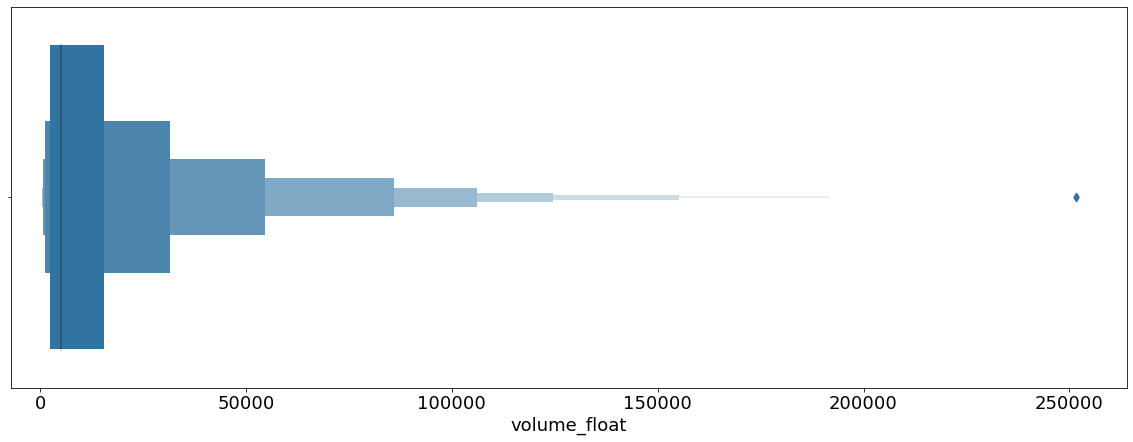

In [42]:
plt.figure(figsize=(20,7))
sns.boxenplot(products["volume_float"])

In [18]:
order_items

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,volume
950,023669233121f0fb7899e5be2b22885f,2,4dba4de4cd67ba2191c34468ac2ca841,2018-04-23 04:54:27,38.90,16.56,Alta
949,023669233121f0fb7899e5be2b22885f,1,6b6b162b177d0f36987993aecbe1c65f,2018-04-23 04:54:27,109.99,23.25,Média
951,023669233121f0fb7899e5be2b22885f,3,784c94d1803e49492d2758907914b26c,2018-04-23 04:54:27,109.90,19.76,Alta
16994,26eb89695b8e32d466d5fa42266eaf87,1,784c94d1803e49492d2758907914b26c,2018-05-24 20:18:53,109.90,23.08,Alta
37641,556c0a42a8e9e57a6e411701908f0fd3,1,636d2453c7fc23e23b0e356f1dc20793,2018-07-19 03:50:07,59.90,39.02,Alta
...,...,...,...,...,...,...,...
74495,a9c0a9c746e342b36428283561c3ed34,2,797b0bf4316b47e82d45e3a4b5d828da,2017-09-01 11:04:35,9.90,9.34,Baixa
82306,bb05bd3bbacf1e3c6026b43b44a6631c,1,a0425426bd812474106a782b2979e310,2018-05-29 02:55:03,22.30,8.88,Baixa
84514,c003c1face3c31cba0af4ab5314f3332,1,dedb5adefe63796ce6edd624d0ebd8a8,2017-08-18 11:05:09,45.00,8.72,Baixa
87463,c69e7e591d11462c6a11215e52c4329b,1,64367bed3ed96fd9381676fbe33b6443,2018-06-21 22:31:17,99.00,22.51,Média


In [19]:
(
    products
    .groupby("volume")
    .agg(avg=pd.NamedAgg(column="volume_float", aggfunc="mean"),
         std=pd.NamedAgg(column="volume_float", aggfunc="std"),
         min_=pd.NamedAgg(column="volume_float", aggfunc="min"),
         max_=pd.NamedAgg(column="volume_float", aggfunc="max"),
        )
)

,avg,std,min_,max_
volume,,,,
Alta,89048.906475,39108.651648,50388.0,251625.0
Baixa,6166.733653,5762.243784,352.0,25000.0
Média,35156.264368,6972.608468,25069.0,50000.0


In [20]:
# Regra para definir o tamanho da ordem
# 4 itens de volume "Baixa" -> compõem 1 ordem "Média"
# 8 itens de volume "Baixa" -> compõem 1 ordem "Alta"
# 2 itens de volume "Média" -> compõem 1 ordem "Alta"

volumes = (
    order_items
    .groupby(["order_id", "volume"])
    .agg(count=pd.NamedAgg(column="order_id", aggfunc="count"))
    .reset_index()
    .pivot(index="order_id", columns="volume", values="count")
    .reset_index()
    .fillna(0)
)
volumes["volume"] = np.where(volumes["Alta"] != 0, "Alta",
                             np.where(volumes["Média"] > 1, "Alta",
                                      np.where(volumes["Baixa"] >= 8, "Alta",
                                               np.where(volumes["Média"] == 1, "Média",
                                                        np.where(volumes["Baixa"].between(4,7), "Média",
                                                                 np.where(volumes["Baixa"] < 4, "Baixa",
                                                                          "UNKNOWN"
                                                                         )
                                                                )
                                                       )
                                              )
                                     )
                            )

orders = orders.join(volumes[["order_id", "volume"]].drop_duplicates().set_index("order_id"), on="order_id", how="inner")
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,volume
171,93ec3e2c9a4beee38c28973d307093e1,330ca6b207006779da875ef48faef608,delivered,2018-03-29 14:27:41,2018-03-29 14:35:21,2018-04-04 23:16:22,2018-04-06 22:52:39,2018-04-11 00:00:00,17a053fcb14bd219540cbde0df490be0,Alta
173,6245ae0abd9de1ae647b5da78c0ea69b,d68585c54450af4bfc04cc6cccbcd607,delivered,2017-09-11 07:54:38,2017-09-11 08:10:08,2017-09-13 18:22:19,2017-09-16 16:12:24,2017-09-27 00:00:00,aae3bfea055532c57fb453ed3ec80b30,Baixa
182,75351e48296ef42211a0b80c427aae57,cf9e2b07f78cce347089900f49fb4746,delivered,2017-03-14 16:25:43,2017-03-14 16:25:43,2017-03-30 13:22:17,2017-04-03 13:37:42,2017-04-10 00:00:00,ca3bd7cd9f149df75950150d010fe4a2,Baixa
274,28fa410eec232354726af94904c6fa9b,229755021cdd010bc07d4f5b35c78ef6,delivered,2018-03-17 15:21:11,2018-03-20 03:48:59,2018-04-05 00:32:57,2018-04-06 01:23:24,2018-04-16 00:00:00,7c67e1448b00f6e969d365cea6b010ab,Média
361,c2d07d9078b700b9198a126183867c16,20c5718e5f50e1e3800046039376e216,delivered,2018-08-14 17:48:09,2018-08-14 18:23:55,2018-08-16 09:02:00,2018-08-21 14:06:44,2018-08-30 00:00:00,0951a6e282947e09cd47969f4ed0b47f,Baixa
...,...,...,...,...,...,...,...,...,...,...
99317,e9f3ac5f695705ef6cd2678f8b7595e7,eac7448820de7d9ad1425dc2b33568e6,delivered,2018-01-27 19:00:21,2018-01-27 19:18:04,2018-01-29 23:36:56,2018-02-05 21:07:39,2018-02-20 00:00:00,0adac9fbd9a2b63cccaac4f8756c1ca8,Baixa
99334,b4cec7d0224b919cac7a6d513cc0884f,95e719d72780395652555c67d60d1530,delivered,2018-02-06 12:46:51,2018-02-07 02:56:12,2018-02-08 20:14:04,2018-02-09 19:14:46,2018-02-26 00:00:00,b18dc380845b24038cfc48006478f099,Baixa
99358,3f1ce5993887adf8fa64399d04ddd7eb,e865e63a5fdb1e8a91eb0d8f6aa3129b,delivered,2018-04-02 23:32:37,2018-04-02 23:48:04,2018-04-05 23:33:35,2018-04-06 22:12:16,2018-04-12 00:00:00,1025f0e2d44d7041d6cf58b6550e0bfa,Média
99401,add4f182072426430ee6c993eab97efe,b87639f5efd3e2316dca5dec5e2f88f4,delivered,2018-01-24 02:23:00,2018-01-25 02:58:03,2018-01-26 19:26:24,2018-01-29 23:33:51,2018-02-08 00:00:00,fa1c13f2614d7b5c4749cbc52fecda94,Baixa


# Delivery men

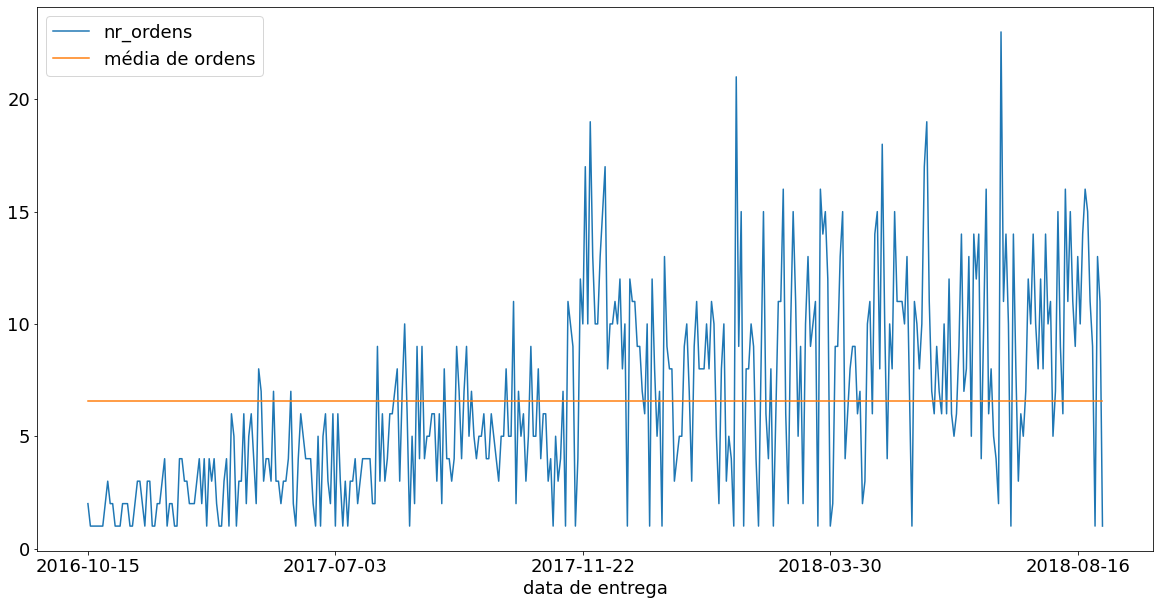

In [21]:
df = (
    orders
    .groupby(pd.to_datetime(orders.order_delivered_carrier_date).dt.strftime("%Y-%m-%d"))
    .agg(nr_ordens=pd.NamedAgg("order_id", "count"))
    .reset_index()
)
df = df.rename(columns={"order_delivered_carrier_date":"data de entrega"})
df["média de ordens"] = np.mean(df.nr_ordens)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
df.plot(figsize=(20, 10), x="data de entrega", y=["nr_ordens", "média de ordens"])

In [22]:
print("Número médio de entregas por dia:", np.mean(df.nr_ordens))
print("Desvio Padrão:", np.std(df.nr_ordens))

Número médio de entregas por dia: 6.574209245742092
Desvio Padrão: 4.3352475515644056


### Com as geolocalizações de SP que sobraram, uma amostra será tirada aleatóriamente como pontos para delivery men

- para podermos testar os 2 cenários possíveis 1) nr de entregas > nr de entregadores disponíveis e 2) nr de entregadores disponíveis > nr de entregas, foi selecionado uma amostra (arbitráriamente) de 10 entregadores, visto que no gráfico acima a média é de 6 entragas por dia.
- a capacidade de entrega do entregador será definida aleatóriamente

In [23]:
deliveryman_geolocations = geolocations.sample(n=10, random_state=39)
deliveryman_geolocations = deliveryman_geolocations.rename(columns={"geolocation_zip_code_prefix":"geolocation_id", "id":"deliveryman_id"})
np.random.seed(39)
deliveryman_geolocations["car_capacity__c"] = [["Alta", "Média", "Baixa"][i] for i in np.random.randint(3, size=10)]
deliveryman_geolocations

,geolocation_id,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,deliveryman_id,car_capacity__c
254705,11420,-24.006472,-46.272175,GUARUJA,SP,254705,Média
284178,12940,-23.115526,-46.552918,ATIBAIA,SP,284178,Média
122019,5208,-23.407401,-46.758610,SAO PAULO,SP,122019,Média
165215,6525,-23.415004,-46.897116,SANTANA DE PARNAIBA,SP,165215,Alta
86788,4310,-23.630328,-46.640746,SAO PAULO,SP,86788,Alta
96477,4511,-23.595924,-46.669864,SAO PAULO,SP,96477,Baixa
212140,8676,-23.554467,-46.308525,SUZANO,SP,212140,Alta
227795,9330,-23.666131,-46.413293,MAUA,SP,227795,Alta
82413,4225,-23.597327,-46.595990,SAO PAULO,SP,82413,Média
253167,11320,-23.973751,-46.371917,SAO VICENTE,SP,253167,Baixa


# Plots

[Text(0.5, 1.0, 'Delivery Men Geolocations')]

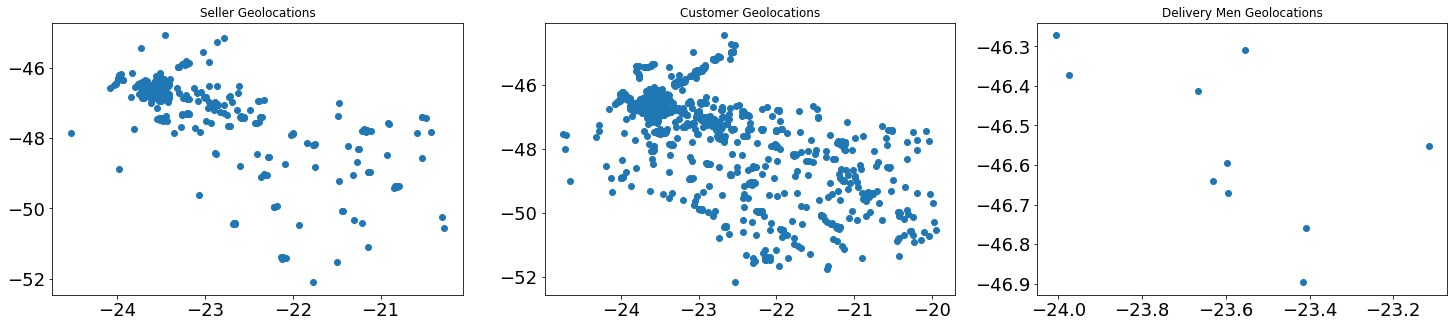

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25,5))

ax1.scatter(data=sellers_geolocation, x="geolocation_lat", y="geolocation_lng")
ax1.set(title="Seller Geolocations")

ax2.scatter(data=customer_geolocations, x="geolocation_lat", y="geolocation_lng")
ax2.set(title="Customer Geolocations")

ax3.scatter(data=deliveryman_geolocations, x="geolocation_lat", y="geolocation_lng")
ax3.set(title="Delivery Men Geolocations")

# Salvando bases

In [25]:
print("sellers_geolocation", sellers_geolocation.shape)
print("customer_geolocations", customer_geolocations.shape)
print("deliveryman_geolocations", deliveryman_geolocations.shape)
print("orders", orders.shape)
print("order_items", order_items.shape)

sellers_geolocation (545, 7)
customer_geolocations (2702, 7)
deliveryman_geolocations (10, 7)
orders (2702, 10)
order_items (3076, 7)


In [26]:
sellers_geolocation.to_csv('.\\Bases\\01.Montagem_da_Base\\sellers_geolocation.csv', index=False)
customer_geolocations.to_csv('.\\Bases\\01.Montagem_da_Base\\customer_geolocations.csv', index=False)
deliveryman_geolocations.to_csv('.\\Bases\\01.Montagem_da_Base\\deliveryman_geolocations.csv', index=False)
orders.to_csv('.\\Bases\\01.Montagem_da_Base\\orders.csv', index=False)
order_items.to_csv('.\\Bases\\01.Montagem_da_Base\\order_items.csv', index=False)

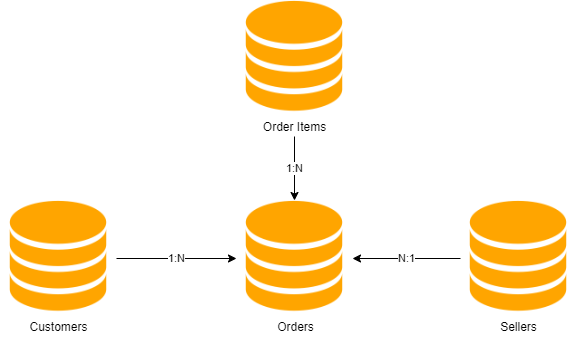

# Bases para o Salesforce

In [27]:
Entregadores__c = deliveryman_geolocations.rename(columns={"deliveryman_id":"Id",
                                                           "geolocation_lat":"DeliveryManLocation__Latitude__s",
                                                           "geolocation_lng":"DeliveryManLocation__Longitude__s",
                                                          })

names = ["Alexandre", "Eduardo", "Henrique", "Murilo", "Theo", "André", "Enrico", "Henry", "Nathan", "Thiago"]
Entregadores__c["Name"] = names
Entregadores__c["Next_WorkDay__c"] = "TRUE"
Entregadores__c = Entregadores__c[["Id", "Name", "car_capacity__c", "DeliveryManLocation__Latitude__s", "DeliveryManLocation__Longitude__s", "Next_WorkDay__c"]]

In [28]:
SolicitacaoEntrega__c = (
    orders
    .join(
        other=(
            sellers_geolocation[["seller_id", "geolocation_lat", "geolocation_lng"]]
            .rename(columns={"geolocation_lat":"CollectPoint__Latitude__s",
                             "geolocation_lng":"CollectPoint__Longitude__s"})
            .set_index("seller_id")
        ),
        on="seller_id",
        how="inner"
    )
    .join(
        other=(
            customer_geolocations[["customer_id", "geolocation_lat", "geolocation_lng"]]
            .rename(columns={"geolocation_lat":"DeliveryPoint__Latitude__s",
                             "geolocation_lng":"DeliveryPoint__Longitude__s"})
            .set_index("customer_id")
        ),
        on="customer_id",
        how="inner"
    )
    .rename(columns={"order_id":"Id",
                     "order_purchase_timestamp":"CreatedDate",
                     "volume":"TamanhoPacote__c"})
    [["Id",
      "TamanhoPacote__c",
      "CollectPoint__Latitude__s",
      "CollectPoint__Longitude__s",
      "DeliveryPoint__Latitude__s",
      "DeliveryPoint__Longitude__s",
      "CreatedDate"]]
)

### Salvando bases para importação no banco de dados do Salesforce

In [29]:
Entregadores__c.to_csv('.\\Bases\\01.Montagem_da_Base\\BD_Salesforce\\Entregadores__c.csv', index=False)
SolicitacaoEntrega__c.to_csv('.\\Bases\\01.Montagem_da_Base\\BD_Salesforce\\SolicitacaoEntrega__c.csv', index=False)